In [55]:
import pandas as pd
from ord_data_load import is_reaction_of_type
from rdkit.Chem.AllChem import ReactionFromSmarts
from chem_render import draw_reaction
from ord_data_load import ORD_PATH, ORD_REPO_PATH

#to disable warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [56]:
all_reactions = pd.read_pickle(f'{ORD_PATH}/all_reactions.pkl')

In [151]:
pd_mask = pd.read_csv(f'{ORD_PATH}/pd_mask.csv.zst', index_col="id").squeeze()
pd_df = all_reactions[pd_mask].copy()
pd_df.head()

,reaction_smile,solvents,reactants,catalysts,reagents,temperature,time,product,yield,notes,patent,original_dataset
id,,,,,,,,,,,,
ord-56b1f4bfeebc4b8ab990b9804e798aa7,CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=C(C=C(C=C3)F)F)C...,[],"[[None, CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=C(C=C(C=...","[[None, C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=C(C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",110.0,None,CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=C(C=C(C=C3)F)F)C...,65.39,"To a solution of ethyl 6-bromo-4-(2,4-difluoro...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-1169cbe9fa064a879ac34b2e524a4e69,CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC.C1=CC=C(C=C1)I...,"[[None, COC1=CC=CC=C1]]","[[None, CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC], [Non...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",100.0,None,CN1C=NC2=C1C=C(C(=C2F)NC3=CC=CC=C3)C(=O)OC,57.47,"9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthen...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-13992005c22d4673aa802b5e140076e8,CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC.C1=CC=C(C=C1)I...,"[[None, COC1=CC=CC=C1]]","[[None, CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC], [Non...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",100.0,None,CN1C=NC2=C1C=C(C(=C2F)NC3=CC=CC=C3)C(=O)OC,65.43,"9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthen...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-a36b48917c9942d1a34637511773ee1f,CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC.C1=CC=C(C=C1)I...,"[[None, COC1=CC=CC=C1]]","[[None, CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC], [Non...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",100.0,None,CN1C=NC2=C1C=C(C(=C2F)NC3=CC=CC=C3)C(=O)OC,75.07,"9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthen...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-5fc624fd97b7430eafbe8dcc049d170b,CC1=NC(=C(C=C1)OC2=CC(=NC=C2)Cl)C.C1=CC(=CC=C1...,"[[None, CC(=O)N(C)C]]","[[None, CC1=NC(=C(C=C1)OC2=CC(=NC=C2)Cl)C], [N...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",150.0,None,CC1=NC(=C(C=C1)OC2=CC(=NC=C2)NC3=CC=C(C=C3)S(=...,46.32,"3-(2-chloropyridin-4-yloxy)-2,6-dimethylpyrid...",None,ord_dataset-00005539a1e04c809a9a78647bea649c


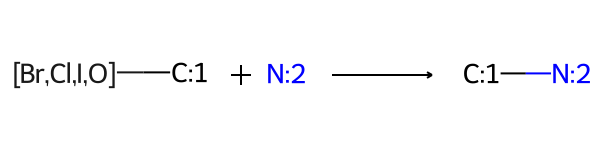

In [58]:
BUCHWALD_RXN_SMARTS = "[c:1]-[Br,Cl,I,O].[NX3:2]>>[c:1]-[NX3:2]"
rxn_pattern = ReactionFromSmarts(BUCHWALD_RXN_SMARTS)
rxn_pattern

In [150]:
%%time
mask = pd_df['reaction_smile'].apply(is_reaction_of_type, reaction_type_pattern=rxn_pattern)
mask.sum()

CPU times: total: 2min 30s
Wall time: 2min 30s


18802

In [185]:
#TODO figure out why dask gave different result

ProgressBar().register()

dds = dd.from_pandas(pd_df['reaction_smile'], npartitions=120)
mask_dd = dds.apply(is_reaction_of_type,
                 reaction_type_pattern=rxn_pattern,
                 # meta=pd.Series(index=pd_df.index, dtype=bool)).compute(scheduler='processes')
                 meta=pd.Series(dtype=bool)).compute(scheduler='processes')
mask_dd.sum()


[########################################] | 100% Completed | 15.52 s
[########################################] | 100% Completed | 15.62 s
[########################################] | 100% Completed | 15.64 s
[########################################] | 100% Completed | 15.66 s
[########################################] | 100% Completed | 15.75 s
[########################################] | 100% Completed | 15.76 s
[########################################] | 100% Completed | 15.87 s
[########################################] | 100% Completed | 15.97 s
[########################################] | 100% Completed | 16.08 s
[########################################] | 100% Completed | 16.19 s
[########################################] | 100% Completed | 16.30 s
[########################################] | 100% Completed | 16.40 s
[########################################] | 100% Completed | 16.41 s
[########################################] | 100% Completed | 16.52 s
[###################

5340

In [149]:
df_buchwald = pd_df[mask].copy()
print("Non-patent sources fraction:", df_buchwald['patent'].isna().sum())

Non-patent sources fraction: 5193


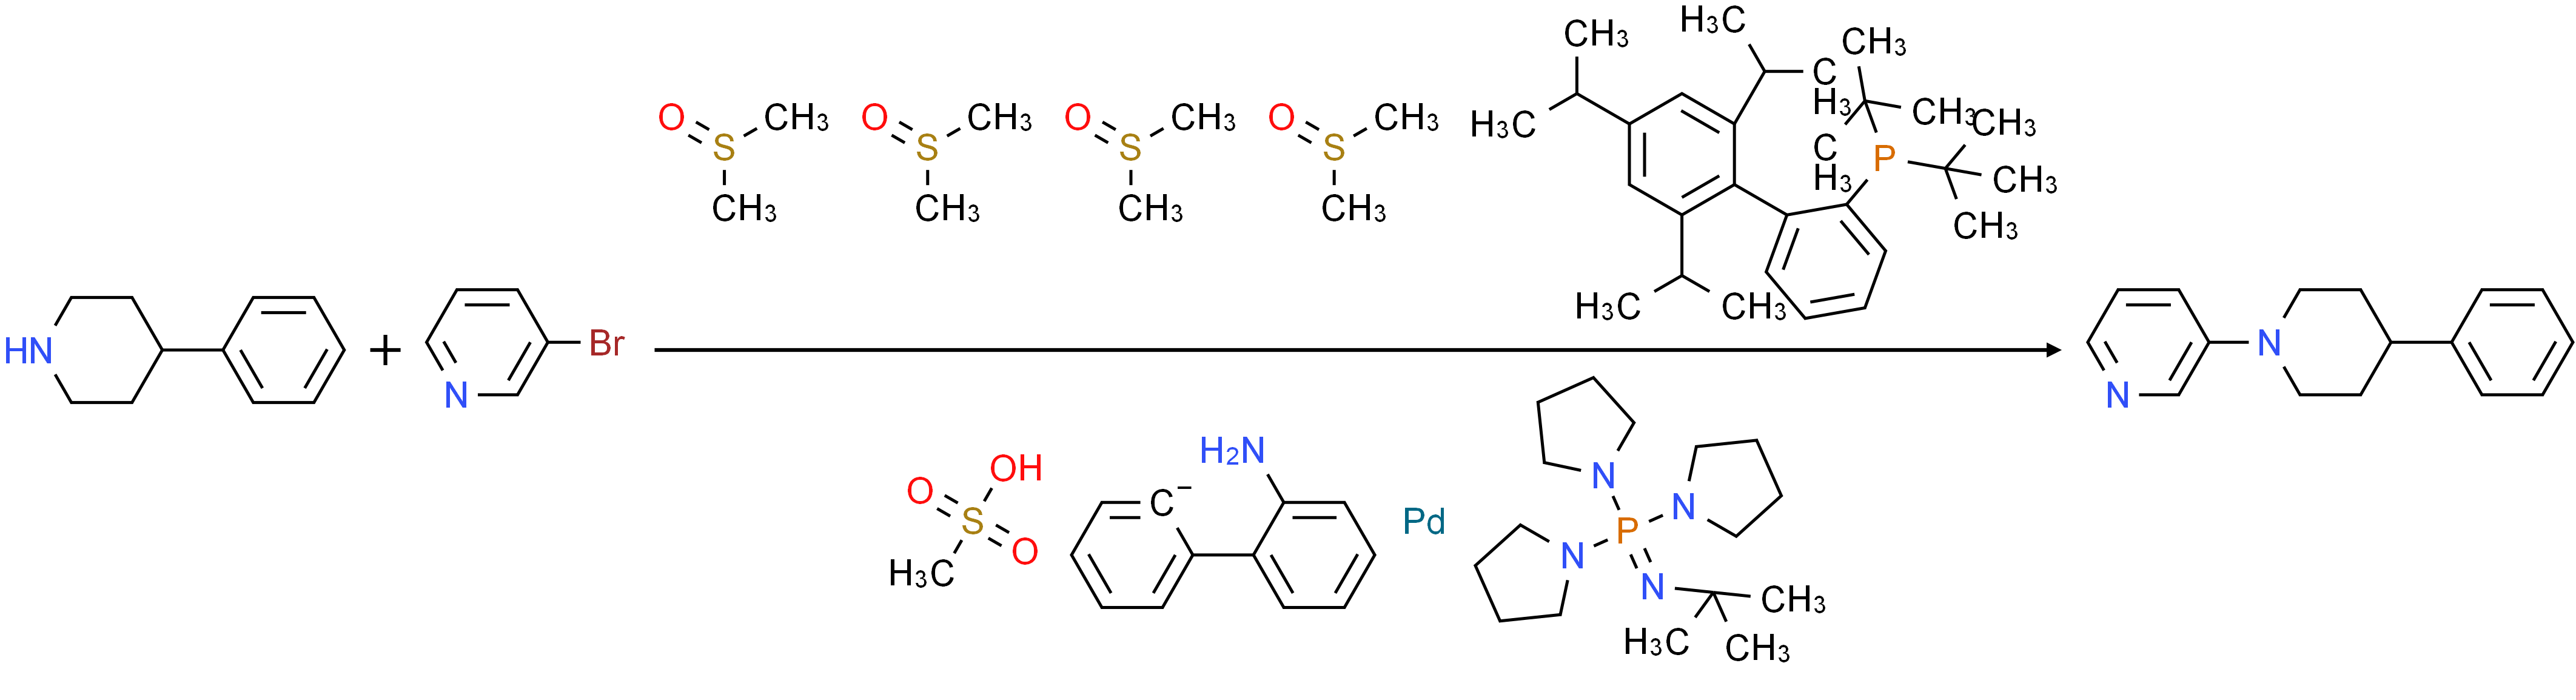

Patent:       None
Reaction_id:  ord-b255954e89124134ab23beda19f99697
None


In [210]:
draw_reaction(df_buchwald)